# Instructions

### This notebook was designed to do statistical analysis for data from Spaak experiments.

## Import packages and read the dataset

In [29]:
import pandas as pd
import numpy as np

# Enable interactive Matplotlib plots in the notebook
# %matplotlib qt5

import matplotlib.pyplot as plt
from matplotlib import cm
import os
# import astropy.convolution as krn
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_rel
import sys
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import seaborn as sns


# Read the dataset
# path_to_dataset = 'C:/Users/artem/Dropbox/Appliedwork/CognitiveSolutions/Projects/DeepEye/TechnicalReports/TechnicalReport1/Test_Spaak/data/approved/analysis/allSubjects_Spaak.csv'
path_to_dataset = 'D:/Dropbox/Appliedwork/CognitiveSolutions/Projects/DeepEye/TechnicalReports/TechnicalReport1/Test_Spaak/data/approved/analysis/allSubjects_Spaak.csv'
df = pd.read_csv(path_to_dataset)



### Filter data

In [30]:
# # filter out excluded participants if needed
# # output_df = output_df[~output_df['deepeye-id'].isin(['2024_01_15_14_19_20', '2024_01_26_17_16_28'])]


# create a unique pp-id for each participant
df['pp_id'] = df['fName'].str.split('.').str[0].str.rsplit('_', 1).str[0]

# Create one code for Model Size, independent of the dress type
df['AOI_stim_adj'] = df.apply(lambda row: row['condition'] + '_' + row['AOI_stim'] if row['AOI_stim'] in ['None', 'other'] else row['AOI_stim'], axis=1)



C:\Users\Artem\AppData\Local\Temp\ipykernel_17924\2124042491.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df['pp_id'] = df['fName'].str.split('.').str[0].str.rsplit('_', 1).str[0]


### Fixation Durations (Proportion of fixation duration on on each stimulus)

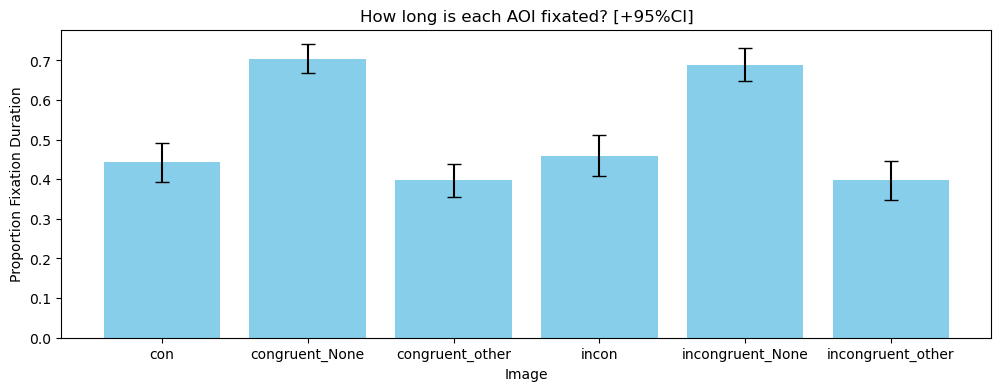

T-statistic: -0.4846456107764182, P-value: 0.631447639996056
0.44273922699571017 0.45939537430155136


In [47]:
# group data per AOI
fixDur = df.groupby(['pp_id', 'trialNr', 'AOI_stim_adj']).FixDur.sum()
fixDur_df = fixDur.reset_index()

# Calculate 'FixDurProp'
fixDur_df['FixDurProp'] = fixDur_df.groupby(['pp_id', 'trialNr'])['FixDur'].transform(lambda x: x / x.sum())

a = fixDur_df.groupby(['pp_id', 'AOI_stim_adj']).FixDurProp.mean().reset_index()

# Calculate mean and standard error of the mean (SEM)
stats = a.groupby(['AOI_stim_adj']).agg(
    mean=('FixDurProp', 'mean'),
    ci_95=('FixDurProp', lambda x: 1.96 * np.std(x, ddof=1) / np.sqrt(len(x)))
)

# Extracting values for plotting
categories = stats.index.tolist()
means = stats['mean'].tolist()
errors = stats['ci_95'].tolist()

# Creating the bar graph with error bars
plt.figure(figsize=(12, 4))
plt.bar(categories, means, color='skyblue', yerr=errors, capsize=5)
# plt.ylim([800, 1800])

# Adding titles and labels
plt.title('How long is each AOI fixated? [+95%CI]')
plt.xlabel('Image')
plt.ylabel('Proportion Fixation Duration')

# Show the plot
plt.show()

# Some stats
con = a[a.AOI_stim_adj == 'con'].FixDurProp
incon = a[a.AOI_stim_adj == 'incon'].FixDurProp

t_stat, p_value = ttest_rel(con, incon)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(con.mean(), incon.mean())


### Fixation Duration

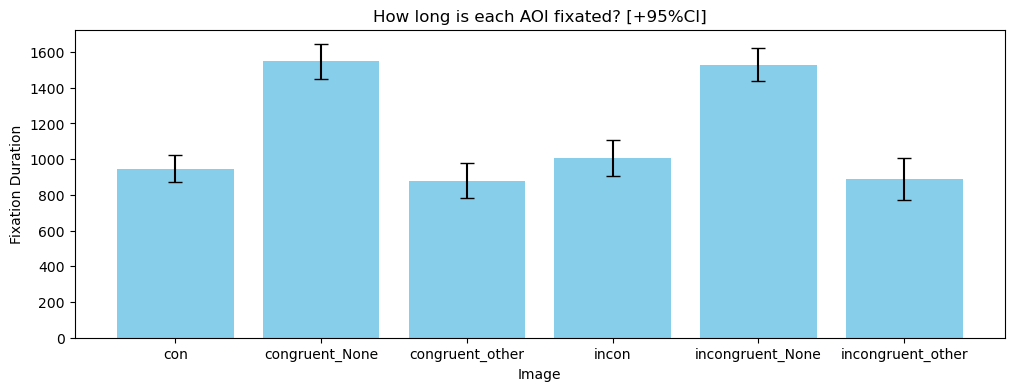

T-statistic: -1.2473078594281517, P-value: 0.2219343381276885
945.0259660423441 1007.6132983024391


In [46]:
a = fixDur_df.groupby(['pp_id', 'trialNr', 'AOI_stim_adj']).FixDur.sum().reset_index() # sum over each AOI for each trial 
a = a.groupby(['pp_id', 'AOI_stim_adj']).FixDur.mean().reset_index() # average across trials for each participant for each AOI

# Calculate mean and standard error of the mean (SEM)
stats = a.groupby(['AOI_stim_adj']).agg(
    mean=('FixDur', 'mean'),
    ci_95=('FixDur', lambda x: 1.96 * np.std(x, ddof=1) / np.sqrt(len(x)))
)

# Extracting values for plotting
categories = stats.index.tolist()
means = stats['mean'].tolist()
errors = stats['ci_95'].tolist()

# Creating the bar graph with error bars
plt.figure(figsize=(12, 4))
plt.bar(categories, means, color='skyblue', yerr=errors, capsize=5)
# plt.ylim([800, 1800])

# Adding titles and labels
plt.title('How long is each AOI fixated? [+95%CI]')
plt.xlabel('Image')
plt.ylabel('Fixation Duration')

# Show the plot
plt.show()



# Some stats
con = a[a.AOI_stim_adj == 'con'].FixDur
incon = a[a.AOI_stim_adj == 'incon'].FixDur

t_stat, p_value = ttest_rel(con, incon)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print(con.mean(), incon.mean())



### Fixation Latency

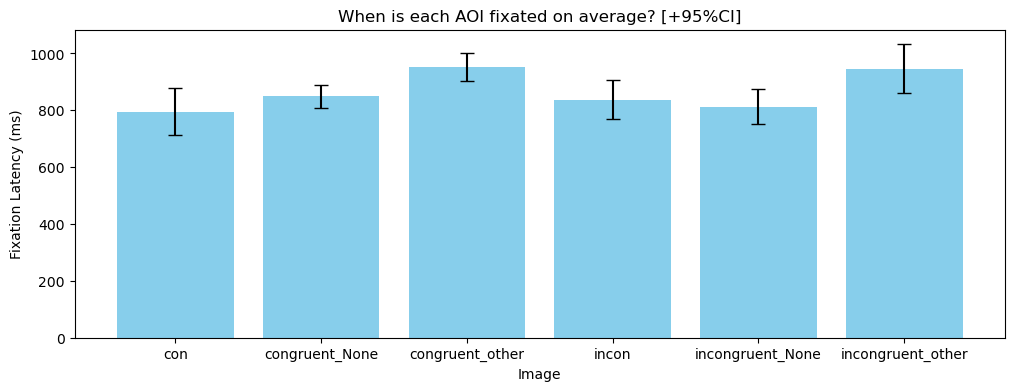

T-statistic: -0.6642768369405649, P-value: 0.511586938558148
795.3448286382461 837.3066537499876


In [53]:
# group data
fixLatency = df.groupby(['pp_id', 'trialNr','AOI_stim_adj']).FixLatency.mean() # mean over each AOI for each trial for each pp
fixLatency_df = fixLatency.reset_index()


a = fixLatency_df.groupby(['pp_id', 'AOI_stim_adj']).FixLatency.mean().reset_index() # average across trials for each participant for each AOI

# Calculate mean and standard error of the mean (SEM)
stats = a.groupby('AOI_stim_adj').agg(
    mean=('FixLatency', 'mean'),
    ci_95=('FixLatency', lambda x: 1.96 * np.std(x, ddof=1) / np.sqrt(len(x)))
)

# Extracting values for plotting
categories = stats.index.tolist()
means = stats['mean'].tolist()
errors = stats['ci_95'].tolist()


# Creating the bar graph with error bars
plt.figure(figsize=(12, 4))
plt.bar(categories, means, color='skyblue', yerr=errors, capsize=5)

# Adding titles and labels
plt.title('When is each AOI fixated on average? [+95%CI]')
plt.xlabel('Image')
plt.ylabel('Fixation Latency (ms)')

# Show the plot
plt.show()

# Some stats
con = a[a.AOI_stim_adj == 'con'].FixLatency
incon = a[a.AOI_stim_adj == 'incon'].FixLatency

t_stat, p_value = ttest_rel(con, incon)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print(con.mean(), incon.mean())

### Plot Distribution of Fixation Latencies

count of datapoints in incongruent_None: 815
count of datapoints in incongruent_other: 356
count of datapoints in incon: 452
count of datapoints in congruent_None: 827
count of datapoints in congruent_other: 391
count of datapoints in con: 425


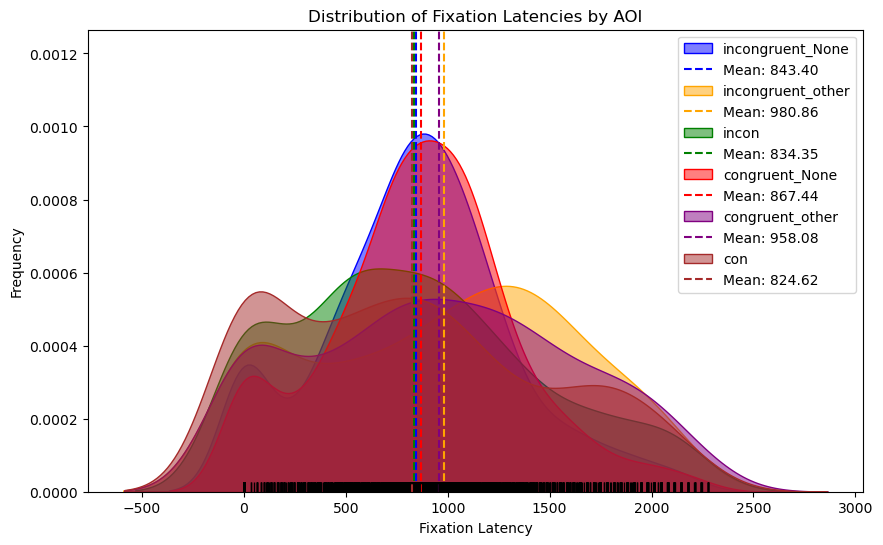

In [54]:
# Plot distributions of latencies

# Set up the plot dimensions and style
plt.figure(figsize=(10, 6))

# Get unique groups
groups = fixLatency_df['AOI_stim_adj'].unique()

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Plot histogram for each group
for i, group in enumerate(groups):
    color = colors[i]
    # Extract the data for the group
    group_data = fixLatency_df[fixLatency_df['AOI_stim_adj'] == group]['FixLatency']
    print(f'count of datapoints in {group}: {group_data.count()}')
    group_data = group_data[group_data < 10000]
    
    # Plot the kde
    sns.kdeplot(data=group_data, fill=True, color=color, alpha=0.5, label=group)
    
    # Plot individual points
    sns.rugplot(data=group_data, height=0.02, color="k")
    
    # Plot the mean vertical line
    mean_data = group_data.mean()
    plt.axvline(mean_data, color=color, linestyle='--', linewidth=1.5, label=f'Mean: {mean_data:.2f}')

# Add legend, title, and labels
plt.legend()
plt.title('Distribution of Fixation Latencies by AOI')
plt.xlabel('Fixation Latency')
plt.ylabel('Frequency')

plt.show()



### Fixation Order (average order of fixations for each model)


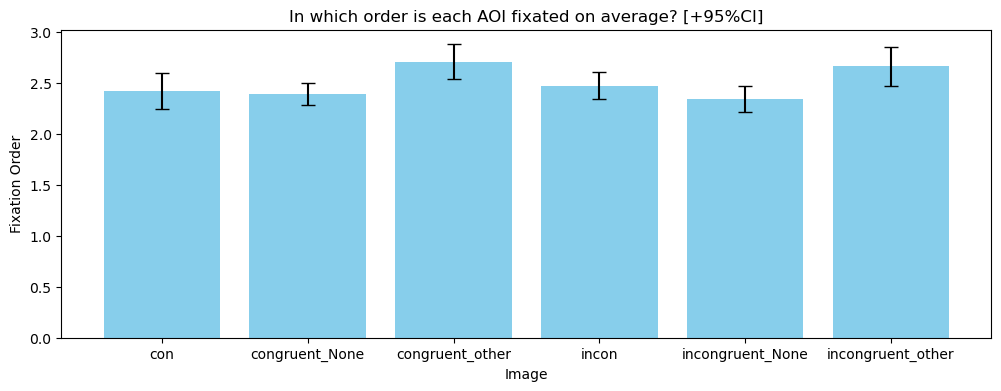

T-statistic: -0.5394859380717905, P-value: 0.5935335133052799
2.421808218116007 2.4708746618813535


In [58]:
# group data
fixOrder = df.groupby(['pp_id', 'trialNr', 'AOI_stim_adj']).FixationOrder.mean()
fixOrder_df = fixOrder.reset_index()

a = fixOrder_df.groupby(['pp_id', 'AOI_stim_adj']).FixationOrder.mean().reset_index() # average across trials for each participant for each AOI

# Calculate mean and standard error of the mean (SEM)
stats = a.groupby('AOI_stim_adj').agg(
    mean=('FixationOrder', 'mean'),
    ci_95=('FixationOrder', lambda x: 1.96 * np.std(x, ddof=1) / np.sqrt(len(x)))
)

# Extracting values for plotting
categories = stats.index.tolist()
means = stats['mean'].tolist()
errors = stats['ci_95'].tolist()



# Creating the bar graph with error bars
plt.figure(figsize=(12, 4))
plt.bar(categories, means, color='skyblue', yerr=errors, capsize=5)
# plt.ylim([800, 1800])

# Adding titles and labels
plt.title('In which order is each AOI fixated on average? [+95%CI]')
plt.xlabel('Image')
plt.ylabel('Fixation Order')

# Show the plot
plt.show()

# Some stats
con = a[a.AOI_stim_adj == 'con'].FixationOrder
incon = a[a.AOI_stim_adj == 'incon'].FixationOrder

t_stat, p_value = ttest_rel(con, incon)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print(con.mean(), incon.mean())

### Fixation Count

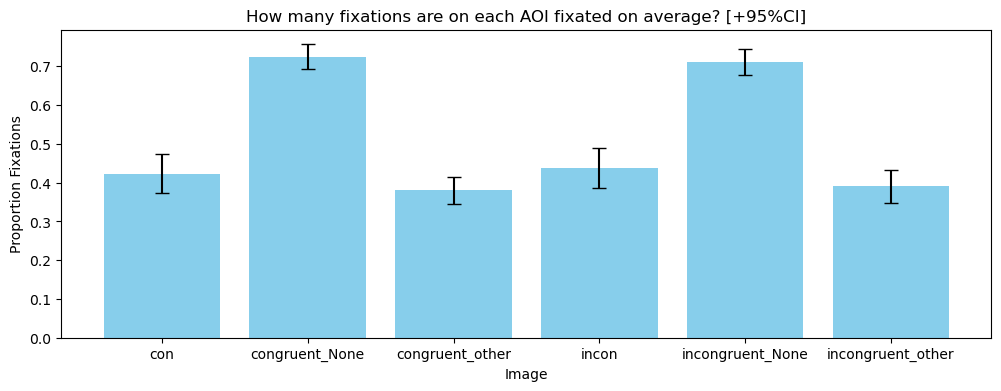

T-statistic: -0.42219585640593055, P-value: 0.675892551517042
0.4231959953932325 0.43720580189920044


In [65]:
# group data
fixCount = df.groupby(['pp_id', 'trialNr', 'AOI_stim_adj']).FixDur.count()
fixCount_df = fixCount.reset_index()
fixCount_df = fixCount_df.rename(columns={'FixDur': 'FixCount'})


# Calculate 'FixCountProp'
fixCount_df['FixCountProp'] = fixCount_df.groupby(['pp_id', 'trialNr'])['FixCount'].transform(lambda x: x / x.sum())

a = fixCount_df.groupby(['pp_id', 'AOI_stim_adj']).FixCountProp.mean().reset_index() # average across trials for each participant for each AOI

# Calculate mean and standard error of the mean (SEM)
stats = a.groupby('AOI_stim_adj').agg(
    mean=('FixCountProp', 'mean'),
    ci_95=('FixCountProp', lambda x: 1.96 * np.std(x, ddof=1) / np.sqrt(len(x)))
)

# Extracting values for plotting
categories = stats.index.tolist()
means = stats['mean'].tolist()
errors = stats['ci_95'].tolist()

# Creating the bar graph with error bars
plt.figure(figsize=(12, 4))
plt.bar(categories, means, color='skyblue', yerr=errors, capsize=5)

# Adding titles and labels
plt.title('How many fixations are on each AOI fixated on average? [+95%CI]')
plt.xlabel('Image')
plt.ylabel('Proportion Fixations')

# Show the plot
plt.show()

# Some stats
con = a[a.AOI_stim_adj == 'con'].FixCountProp
incon = a[a.AOI_stim_adj == 'incon'].FixCountProp

t_stat, p_value = ttest_rel(con, incon)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print(con.mean(), incon.mean())
